In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\user\\Desktop\\datas\\SMSSpamCollection",delimiter='\t', header=None)
print(df.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
print("number of spam messages: ", df[df[0]=='spam'] [0].count())
print("number of ham messages: ", df[df[0]=='ham'] [0].count())

number of spam messages:  747
number of ham messages:  4825


In [3]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
X_train_raw,X_test_raw,y_train,y_test=train_test_split(df.iloc[:,1],
                                    df.iloc[:,0],random_state=50)
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train_raw)
X_test=vectorizer.transform(X_test_raw)
classifier=LogisticRegression()
classifier.fit(X_train,y_train)



LogisticRegression()

In [5]:
predictions=classifier.predict(X_test)
print(predictions)


['spam' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [6]:
# By using enumerate we can find what are the ham and spam mails
for i,prediction in enumerate(predictions[:5]):
    print("Prediction: %s, Actual : %s, Message : %s " % (prediction,y_test[i: i+1],X_test_raw[i: i+1]))


Prediction: spam, Actual : 3409    spam
Name: 0, dtype: object, Message : 3409    Do you want a New Nokia 3510i colour phone Del...
Name: 1, dtype: object 
Prediction: ham, Actual : 2103    ham
Name: 0, dtype: object, Message : 2103    Audrie lousy autocorrect
Name: 1, dtype: object 
Prediction: ham, Actual : 2665    ham
Name: 0, dtype: object, Message : 2665    He remains a bro amongst bros
Name: 1, dtype: object 
Prediction: ham, Actual : 3239    ham
Name: 0, dtype: object, Message : 3239    Good. No swimsuit allowed :)
Name: 1, dtype: object 
Prediction: spam, Actual : 1205    spam
Name: 0, dtype: object, Message : 1205    WIN a year supply of CDs 4 a store of ur choic...
Name: 1, dtype: object 


In [7]:
scores=cross_val_score(classifier,X_train,y_train,cv=5)
print(np.mean(scores), scores)

0.9545348537375011 [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862]


In [8]:
# For this we want to take precision score
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
classifier.fit(X_train,y_train)
precisions=cross_val_score(classifier,X_train,y_train,cv=5,
                           scoring='precision')
print("Precison",np.mean(precisions),precisions)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Precison 0.9923220023676645 [0.98630137 1.         1.         1.         0.97530864]


In [9]:
recall=cross_val_score(classifier,X_train,y_train,cv=5,
                           scoring='recall')
print("Recall",np.mean(recall),recall)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Recall 0.6723874904652938 [0.63157895 0.68421053 0.61403509 0.73913043 0.69298246]


In [10]:
F1=cross_val_score(classifier,X_train,y_train,cv=5,
                           scoring='f1')
print("F1 score",np.mean(F1),F1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

F1 score 0.8007358902819262 [0.77005348 0.8125     0.76086957 0.85       0.81025641]


In [11]:
Accuracy=cross_val_score(classifier,X_train,y_train,cv=5,
                           scoring='accuracy')
print("Accuracy score",np.mean(Accuracy),Accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy score 0.9545348537375011 [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862]


In [12]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
confusion_matrix=confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[4 2]
 [1 3]]


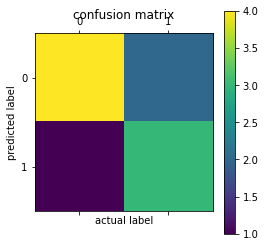

In [13]:
plt.matshow(confusion_matrix)
plt.title("confusion matrix")
plt.colorbar()
plt.xlabel('actual label')
plt.ylabel('predicted label')
plt.show()